#### Use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars). This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. 
#### Your task is to build a model using k-nn classifier to classify the type of cultivar. Access the performance of your model using different values of ‘k’.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/wine_cultivar.csv')
data.head()

,type_of_cultivar,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   type_of_cultivar              178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [4]:
X = data.drop('type_of_cultivar', axis=1)
y = data['type_of_cultivar']

In [5]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
X = pca.transform(X)
pca.explained_variance_ratio_.sum()

0.9998271461166032

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=4, shuffle=False)
params = {'n_neighbors':np.arange(3,21,2), 'weights' : ['uniform', 'distance']}

gs = GridSearchCV(estimator=knn, param_grid=params, scoring='f1_micro', cv=skf)

In [8]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [9]:
print(gs.best_estimator_)
print(gs.best_score_)

KNeighborsClassifier(n_neighbors=19)
0.7338709677419355


In [10]:
y_train.values.reshape(-1, 1).shape
X_train.shape

(124, 2)

In [11]:
k = list(range(3,21,2))
scores_train = []
scores_cv = []

for i in k:
    _knn = KNeighborsClassifier(n_neighbors=i)
    _knn.fit(X_train, y_train)
    _y_pred_train = _knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, _y_pred_train)
    _score_cv = cross_val_score(_knn, X_train, y_train, scoring='accuracy', cv=4).mean()
    
    scores_train.append(train_accuracy)
    scores_cv.append(_score_cv)

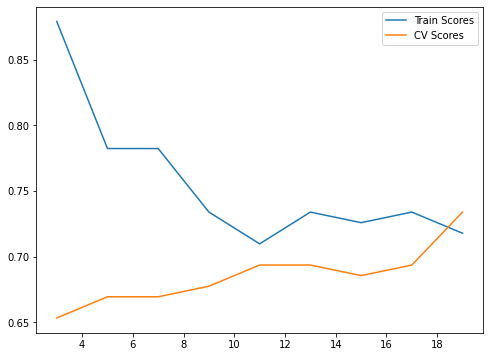

In [12]:
plt.figure(figsize=(8,6))
plt.plot(k, scores_train, label='Train Scores')
plt.plot(k, scores_cv, label='CV Scores')
plt.legend()
plt.show()

### Both GridSearchCV and graph plot suggest '*n_neighbors=19*'

In [13]:
y_pred_test = gs.predict(X_test)
y_pred_train = gs.predict(X_train)

In [14]:
print('F1 Score(Train): ', f1_score(y_train, y_pred_train, average='micro'))
print('F1 Score(Test): ', f1_score(y_test, y_pred_test, average='micro'))

F1 Score(Train):  0.7177419354838711
F1 Score(Test):  0.7407407407407407
